# 1 Fitting a straight line to data

In [0]:
# --------------------------------
# Author : P. Mondal
# Date : March 7, 2020
# Fitting a straight line to data
# --------------------------------

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Installing required packages
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




  Created wheel for ruptures: filename=ruptures-1.0.3-cp36-none-any.whl size=55251 sha256=353a7c1f6f88421b2af1a26cc8cfd44e879af6395ee1f2ffd49da2f39323af90
  Stored in directory: /root/.cache/pip/wheels/8b/a2/15/6e7b600d1415d6d3e746e3004dc23eef3bf7778d35e6afebac
Successfully built ruptures
Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

(200,)


Text(0.5, 1.0, 'Plot of initial data with noise (red) and means (blue)')

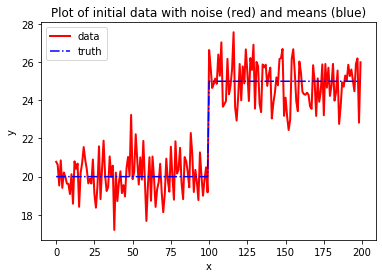

In [3]:
# ----------------------------------------------------------------------------
# Generating measurable 'y' with gaussian noise : 100 points with mean 20 and 
# 100 points with mean 25
# ----------------------------------------------------------------------------
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x[0:200], ym[0:200],'r', lw = '2', label="data") 
print(ym.shape)
pl.plot(range(200), [mu1] * 100 + [mu2] * 100,'b-.',  label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend()
pl.rcParams["figure.figsize"] = (20,20)
pl.title('Plot of initial data with noise (red) and means (blue)')

Fig 1 : The above plot shows initial data with gaussian noise with first 100 data having mean of 20 and the last 100 data with mean of 25 (shown in blue). The data also shows point of change at $x = 100$

In [0]:
#ym[0:5]

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [4]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        # Calculates difference of mean of elements from first to i^th element 
        # and (N-i)^th elements to find POC.  
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i])) 
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.04, mean after: 24.90


In [0]:
'''
# testing 
print(ym.shape)
print(ym[3:].shape)
print(ym[:3].shape)
# print(f(ym[:3])) ## f ????
'''

'\n# testing \nprint(ym.shape)\nprint(ym[3:].shape)\nprint(ym[:3].shape)\n# print(f(ym[:3])) ## f ????\n'

Text(0.5, 1.0, 'Point of change shown color black for synthetic data')

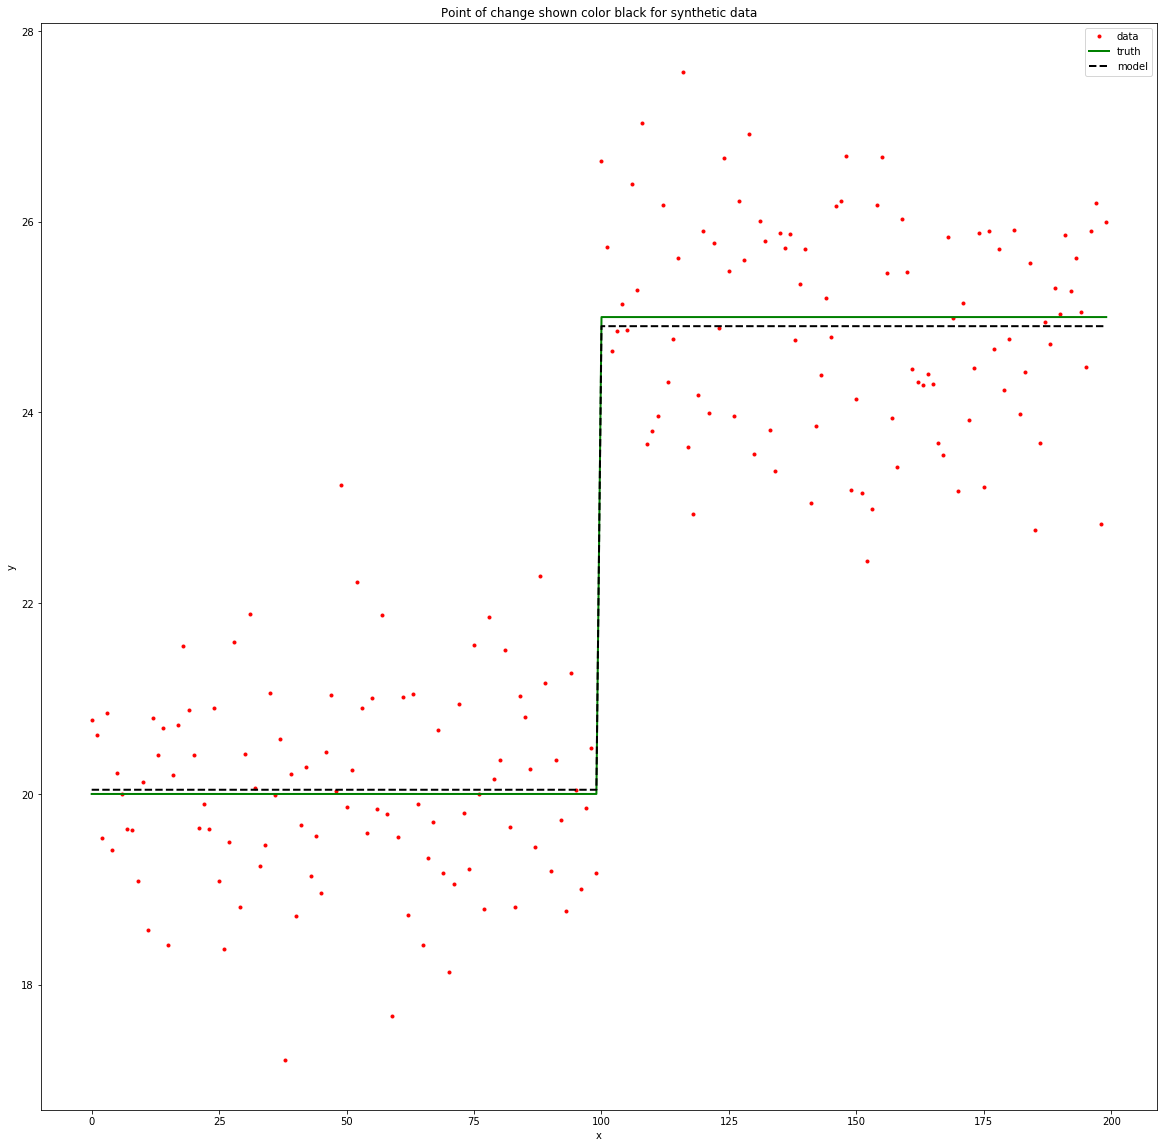

In [5]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, 'r.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, 'g-', lw = 2, label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc),'k--', linewidth=2, label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();
pl.rcParams["figure.figsize"] = (10,8)
pl.title("Point of change shown color black for synthetic data" )

Fig 2: The figure above shows point of change (black) for the synthetic data produced earlier by maximizing the difference of mean which is our model. The data is shown in red and green shows the true mean.

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [6]:
def poc_mse(y):
    ''' returns POC by minimizing the square error
        input : y
        output : poc, mean before, mean after'''
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, inf, np.nan, np.nan
    for i in range(1, N):
      diff_sq1 = np.sum( (y[i:] - f(y[i:]) )**2) \
               + np.sum( (y[:i] - f(y[:i]) )**2)
      #print(i, diff_sq1, diff)
      if diff > diff_sq1:
        diff = diff_sq1
        poc = i
        before, after = f(ym[:i]), f(ym[i:])      
    return poc, before, after

print("poc: {:.2f}, mean before mse: {:.2f}, mean after mse: {:.2f}".format(*poc_mse(ym)))
# If POC is the same data point how can the mean before and after the data change 
# Shouldn't it be the same since
# i--> POC 
# mean_after  = f(y[i:]
# mean_before = f(y[:i])
# Both methods calculate same i (POC). ????
#print("poc: {:.2f}, mean before maxdiff : {:.2f}, mean after maxdiff: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before mse: 20.04, mean after mse: 24.90


In [7]:
'''
xx = np.arange(10)
print(xx)
print(xx**2)
'''

'\nxx = np.arange(10)\nprint(xx)\nprint(xx**2)\n'

In [8]:

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))


poc: 100.00, mean before: 20.04, mean after: 24.90


In [9]:
# My calculation 
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))


poc: 100.00, mean before: 20.04, mean after: 24.90


Text(0.5, 1.0, 'Point of change shown color black for synthetic data : MSE')

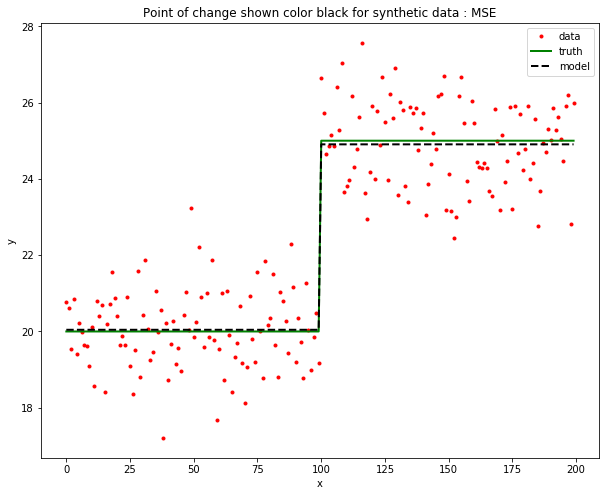

In [10]:
poc2, before2, after2 = poc_mse(ym)   
pl.plot(x, ym, 'r.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, 'g-', lw = 2, label="truth")
pl.plot(x, [before2] * poc2 + [after2] * (len(ym) - poc2),'k--', linewidth=2, label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();
pl.rcParams["figure.figsize"] = (10,8)
pl.title("Point of change shown color black for synthetic data : MSE" )

Fig 3: Calculated POC using MSE i.e. minimizing mean square error . The synthetic data are shown in red, truth mean is shown in green and model calculated using MSE is shown in black. The POC is 100, mean before (mse) : 20.06, mean after (mse) : 25.01. 

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
# ----------------------
# New synthetic dataset
# ---------------------
mu1, mu2 = 20, 25
s1 = 1
s2 = 4
ys = np.concatenate([np.random.randn(100) * s1  + mu1 , np.random.randn(100) * s2 + mu1])

In [12]:
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
    sigma = False    (default : before/after mean)
    sigma = True     (before/after variance)"""

    N = len(y)
    f = np.nanmean
    f1  = np.nanvar
    poc, diff, before, after = 0, 0, np.nan, np.nan
    if sigma == False:
        print("Sigma is False")
        for i in range(1, N):
          # Calculates difference of mean of elements from first to i^th element 
          # and (N-i)^th elements to find POC.  
          diff_here = np.abs(f(y[i:]) -  f(y[:i])) 
          if diff < diff_here:
              diff = diff_here
              poc = i
              before, after = f(y[:i]), f(y[i:])

    if sigma == True:
        print("Sigma is True")
        for i in range(1, N):
          # Calculates difference of var of elements from first to i^th element 
          # and (N-i)^th elements to find POC.  
          diff_here = np.abs(f1(y[i:]) -  f1(y[:i])) 
          #print("vari", f1(ym[i:]))
          if diff < diff_here:
              diff = diff_here
              poc = i
              before, after = f1(y[:i]), f1(y[i:])

    return(poc, before, after)  
print("poc: {:.2f}, variance before: {:.2f}, variance after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))


Sigma is True
poc: 108.00, variance before: 1.31, variance after: 17.36


Sigma is True


Text(0.5, 1.0, 'Point of change shown color black for synthetic data : Var')

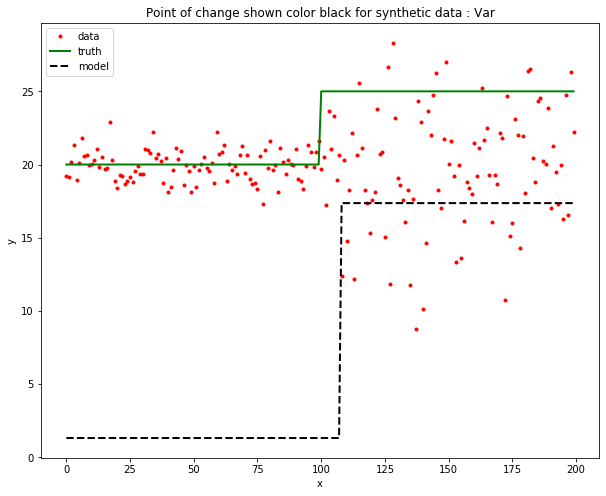

In [13]:
poc3, before3, after3 = maxdiff(ys, sigma = True)   
pl.plot(x, ys, 'r.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, 'g-', lw = 2, label="truth")
pl.plot(x, [before3] * poc3 + [after3] * (len(ys) - poc3),'k--', linewidth=2, label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();
pl.title("Point of change shown color black for synthetic data : Var" )

Fig 4: Calculated point of change using max variance method. Our calculation shows that $x = 101$ is the point of maximum variance i.e. POC (shown in black). The real data is shown in red and true fit is shown in green.

In [14]:
... ## ????

Ellipsis

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

In [15]:
# install and import the rupture package
# pip3 install ruptures
# ref : https://arxiv.org/pdf/1801.00826.pdf
import ruptures as rp
algo.predict??

Object `algo.predict` not found.


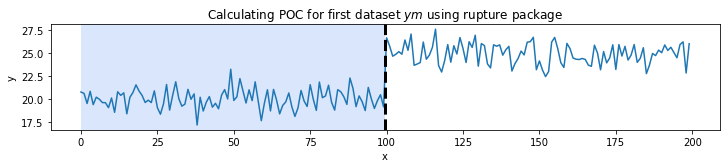

In [16]:
# detection of POC using rupture
algo = rpt.Pelt(model='l1').fit(ym)
result = algo.predict(pen=5)

# display
rpt.display(ym, [100], result)
pl.rcParams["figure.figsize"] = (15,10)
pl.title('Calculating POC for first dataset $ym$ using rupture package')
pl.xlabel('x')
pl.ylabel('y')
pl.show()

Fig 5 : The figure above shows point of change (black dashed line) calculated using rupture package. The POC, calculated using 'l1' model shows that POC for this dataset is at $x = 100$ 

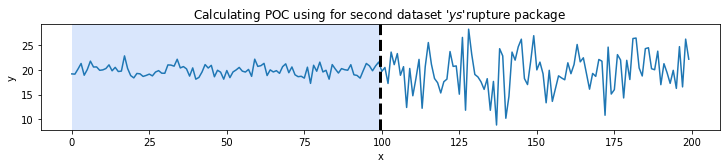

In [17]:
# detection
# Don't understand "l1", "rbf", pen

algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=10)

# display
rpt.display(ys, [100], result)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating POC using for second dataset '$ys$'rupture package ")
pl.show()

In [0]:
#print(type(ys))

Fig 6 : The figure above shows that the POC was detected at $x = 100$ which was calculated using rupture package using 'rbf' model.

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [19]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv")
eq1.describe()

,Unnamed: 0,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06,4.500000e+06
mean,2.250000e+06,4.616407e+00,8.852012e-01
std,1.299038e+06,2.614006e+01,3.374432e-01
min,0.000000e+00,-4.621000e+03,3.008971e-01
25%,1.125000e+06,2.000000e+00,5.934956e-01
50%,2.250000e+06,5.000000e+00,8.849986e-01
75%,3.374999e+06,7.000000e+00,1.177597e+00
max,4.499999e+06,3.252000e+03,1.469100e+00


In [20]:
eq1.head()

,Unnamed: 0,acoustic_data,time_to_failure
0,0,12,1.4691
1,1,6,1.4691
2,2,8,1.4691
3,3,5,1.4691
4,4,8,1.4691


In [21]:
eq1.columns
print(eq1['acoustic_data'].shape)


(4500000,)


In [22]:
# Initial data preparation :
data1x = pd.DataFrame()
data1y = pd.DataFrame()
data1y = eq1['acoustic_data']
data1x = eq1['time_to_failure']
#print(data1x[:5])
y_test = eq1.acoustic_data
print(data1y)

0          12
1           6
2           8
3           5
4           8
           ..
4499995     4
4499996     6
4499997     1
4499998     3
4499999     4
Name: acoustic_data, Length: 4500000, dtype: int64


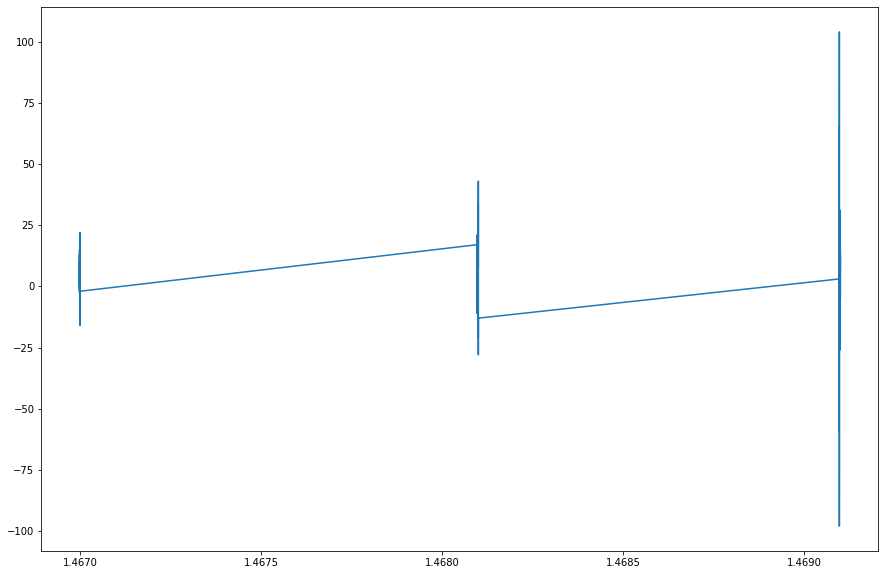

In [23]:
#pl.plot(eq1['time_to_failure'], eq1['acoustic_data'])
set1 = 10000
pl.plot(data1x[:set1], data1y[:set1])

# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




In [24]:
y_eq = data1y.iloc[:].values
print(y_eq[0:2])

[12  6]


In [0]:
# ---------------------------------------------------------------------------
# Exact segmentation: dynamic programming
# The method is implemented in :class:`ruptures.detection.Dynp`.
# Roughly speaking, it computes the cost of all subsequences of a given signal.
# The number of computed costs is of the order :math:`\mathcal{O}(Kn^2)`,
# where :math:`K` is the number
# of change points and :math:`n` the number of samples.
# ref : Charles Truong=ruptures: change point detection in Python
# ---------------------------------------------------------------------------
algo1 = rpt.Dynp(model="rbf").fit(y_eq[0:set1])
result_1 = algo1.predict(n_bkps=1)



In [0]:
result_2 = algo1.predict(n_bkps=2)


In [0]:
result_3 = algo1.predict(n_bkps=3)

# Note : set1 = 10000 data with k > 1 is taking more than 4 hour to run and hence I showed only set1 = 10000 datapoint with k = 1

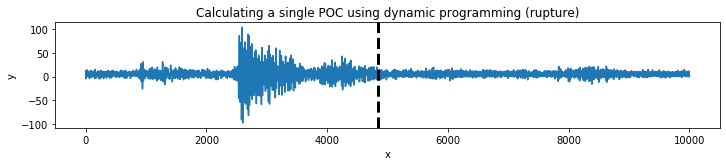

NameError: ignored

In [0]:
# display
rpt.display(eq1.acoustic_data.values[:10000], [], result_1)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture)")
pl.show()

rpt.display(eq1.acoustic_data.values[:10000], [], result_2)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture)")
pl.show()

rpt.display(eq1.acoustic_data.values[:10000], [], result_3)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture): k=1")
pl.show()


**Fig** 7 : The figure above shows single point of change of first 10000 earth quake datapoints calculated using exact segmentation method implemented using rupture package Dynp. 

In [0]:
rpt.Dynp??
# Sesond set of data
set2 = 5000
algo2 = rpt.Dynp(model = "rbf").fit(y_eq[0:set2])
result2_1 = algo2.predict(n_bkps=1)
result2_2 = algo2.predict(n_bkps=2)
result2_3 = algo2.predict(n_bkps=3)


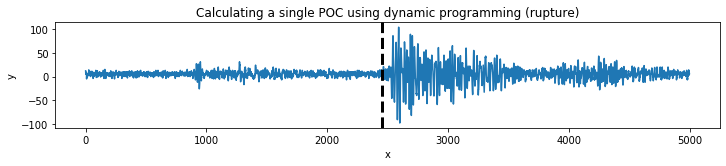

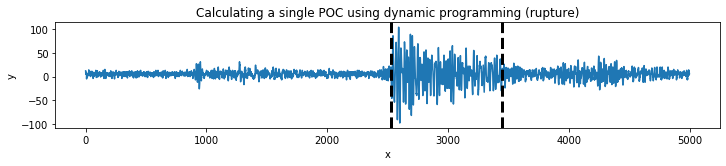

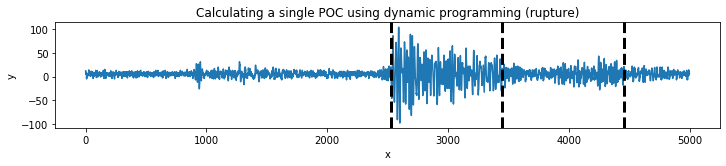

In [33]:
# display
rpt.display(eq1.acoustic_data.values[:set2], [], result2_1)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture)")
pl.show()

rpt.display(eq1.acoustic_data.values[:set2], [], result2_2)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture)")
pl.show()

rpt.display(eq1.acoustic_data.values[:set2], [], result2_3)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture)")
pl.show()


Fig 8: The fugure above shows POC detection using $Rupture$ package. The top, 
middle, bottom panels show detected POC  = 1,2,3 for first $5000$ datapoints.
# Note, the dynamical segmentation method used here has complexity of computational complexity $O(kN^2)$

In [0]:
# set 3 data
set3 = 1000
algo3 = rpt.Dynp(model = "rbf").fit(y_eq[0:set3])
result3_1 = algo3.predict(n_bkps=1)
result3_2 = algo3.predict(n_bkps=2)
result3_3 = algo3.predict(n_bkps=3)


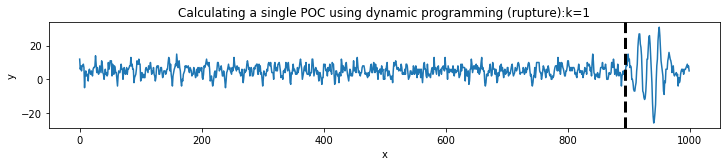

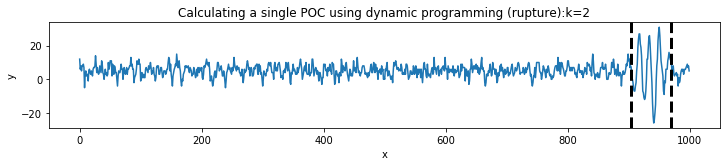

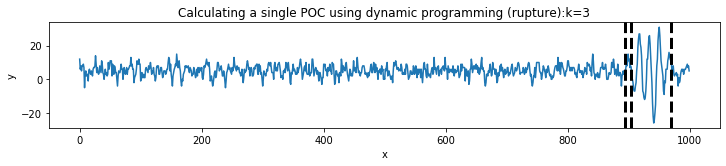

In [35]:
# display
rpt.display(eq1.acoustic_data.values[:set3], [], result3_1)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture):k=1")
pl.show()

rpt.display(eq1.acoustic_data.values[:set3], [], result3_2)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture):k=2")
pl.show()

rpt.display(eq1.acoustic_data.values[:set3], [], result3_3)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using dynamic programming (rupture):k=3")
pl.show()


Fig 10: The fugure above shows POC detection using $Rupture$ package. The top, middle, bottom panels show detected POC  = 1,2,3 for first $1000$ datapoints.

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

# Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. 

In [0]:
algon = rpt.Binseg('rbf').fit(y_eq[0:set1])

resultn_1 = algon.predict(n_bkps=1)
resultn_2 = algon.predict(n_bkps=2)
resultn_3 = algon.predict(n_bkps=3)

caption (note that your plot does not need to look exactly like mine

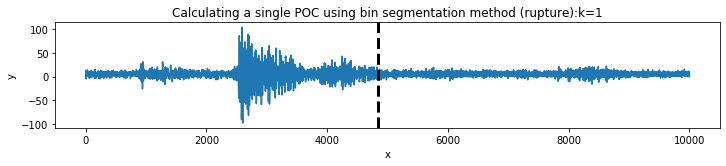

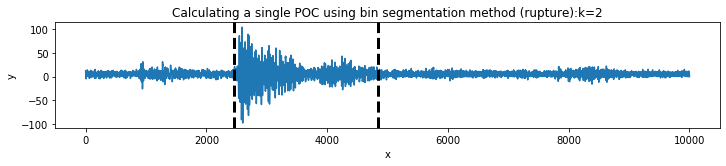

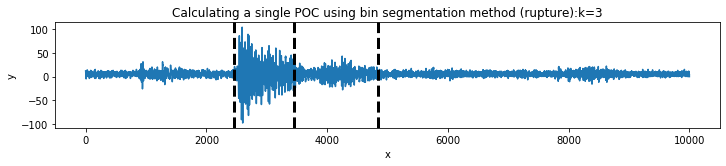

In [41]:
# display
rpt.display(eq1.acoustic_data.values[:set1], [], resultn_1)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using bin segmentation method (rupture):k=1")
pl.show()

rpt.display(eq1.acoustic_data.values[:set1], [], resultn_2)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using bin segmentation method (rupture):k=2")
pl.show()

rpt.display(eq1.acoustic_data.values[:set1], [], resultn_3)
pl.rcParams["figure.figsize"] = (15,10)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Calculating a single POC using bin segmentation method (rupture):k=3")
pl.show()


Fig 11: The figure above shows POC detection using $Rupture$ package. The top, middle, bottom panels show detected POC  = 1,2,3 for first $10000$ datapoints. computational complexity $O(NlogN)$.